In [18]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [5]:
#Load Dataset
df = pd.read_csv("../data/heart_disease.csv")
df["ca"].fillna(df["ca"].mean(),inplace=True)
df['thal'].fillna(df["thal"].mean(),inplace=True)
X=df.drop("num",axis=1)
y=df["num"]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

C:\Users\AIO\AppData\Local\Temp\ipykernel_6232\1166457486.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ca"].fillna(df["ca"].mean(),inplace=True)
C:\Users\AIO\AppData\Local\Temp\ipykernel_6232\1166457486.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [19]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object

In [6]:

from sklearn.decomposition import PCA
pca=PCA()
X_pca=pca.fit_transform(X_scaled)
print("Original shape:", X_scaled.shape)
print("Transformed shape",X_pca.shape)

Original shape: (303, 13)
Transformed shape (303, 13)


In [16]:
# Explained variance
expplained_variance=pca.explained_variance_ratio_
cumulative_variance=np.cumsum(explained_variance)

# Print variance explained by first few components
for i, ev in enumerate(explained_variance[:10],1):
    print(f"PC{i}: {ev:.3f}, Cumulative: {cumulative_variance[i-1]:.3f}")

PC1: 0.237, Cumulative: 0.237
PC2: 0.123, Cumulative: 0.360
PC3: 0.095, Cumulative: 0.455
PC4: 0.085, Cumulative: 0.540
PC5: 0.076, Cumulative: 0.616
PC6: 0.068, Cumulative: 0.683
PC7: 0.066, Cumulative: 0.749
PC8: 0.060, Cumulative: 0.809
PC9: 0.053, Cumulative: 0.862
PC10: 0.043, Cumulative: 0.906


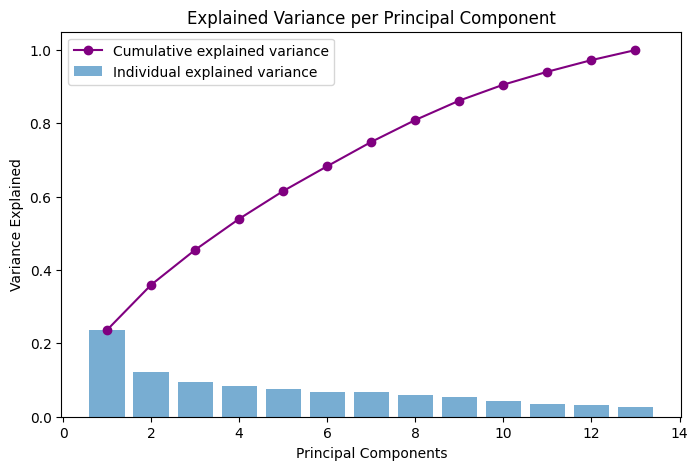

In [ ]:

plt.figure(figsize=(8,5))
plt.bar(range(1,len(explained_variance)+1),explained_variance,alpha=.6, label="Individual explained variance")
plt.plot(range(1,len(explained_variance)+1),cumulative_variance,marker='o', color='purple',label="Cumulative explained variance")
plt.xlabel("Principal Components")
plt.ylabel("Variance Explained")
plt.title("Explained Variance per Principal Component")
plt.legend()
plt.show()




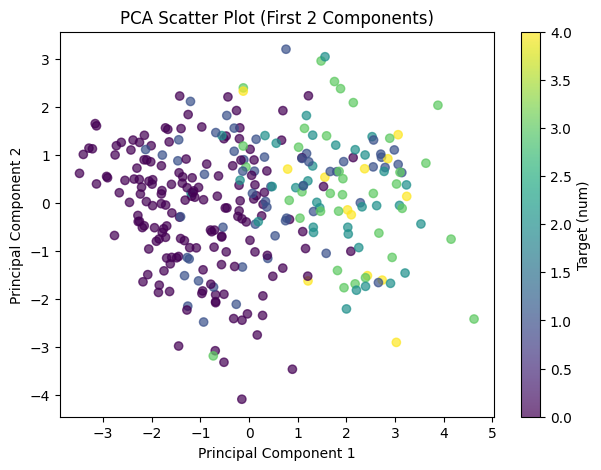

In [15]:
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot (First 2 Components)")
plt.colorbar(label="Target (num)")
plt.show()
